Original Dataset Shape: (100, 2)
Reduced Dataset Shape (PCA): (100, 1)
Eigenvalues: [1.75507122 0.2651308 ]
Eigenvectors (Principal Components): [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


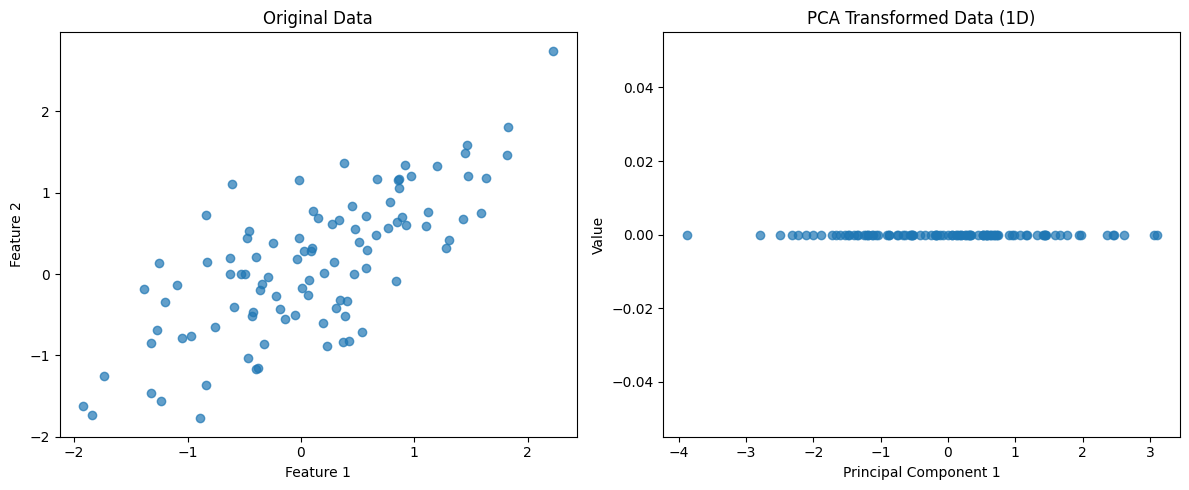

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# PCA Algorithm Function
def pca(X, n_components):
    """
    Perform PCA on dataset X to reduce to 'n_components' dimensions.
    Parameters:
    - X: Original dataset (numpy array of shape (n_samples, n_features))
    - n_components: Number of principal components to reduce to

    Returns:
    - X_pca: Transformed dataset in the new coordinate system
    - eigenvalues: Eigenvalues associated with principal components
    - eigenvectors: Eigenvectors representing the principal components
    """
    # Step 1: Standardize the data (zero mean, unit variance)
    X_scaled = StandardScaler().fit_transform(X)

    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(X_scaled, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 4: Sort the eigenvectors by the largest eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top 'n_components' eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Step 6: Transform the data to the new coordinate system
    X_pca = np.dot(X_scaled, selected_eigenvectors)

    return X_pca, sorted_eigenvalues, sorted_eigenvectors

# Example dataset (you can replace this with any dataset)
# Sample dataset: 2 features and 100 samples
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # covariance matrix with correlation
X = np.random.multivariate_normal(mean, cov, 100)

# Perform PCA to reduce dimensions to 1
n_components = 1
X_pca, eigenvalues, eigenvectors = pca(X, n_components)

# Print the results
print("Original Dataset Shape:", X.shape)
print("Reduced Dataset Shape (PCA):", X_pca.shape)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors (Principal Components):", eigenvectors)

# Plotting the original data and the transformed data
plt.figure(figsize=(12, 5))

# Original Data Plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# PCA Transformed Data Plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca, np.zeros_like(X_pca), alpha=0.7)
plt.title('PCA Transformed Data (1D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Value')

plt.tight_layout()
plt.show()
